### Libraries

In [1]:
import numpy as np 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator,load_img
import sklearn.metrics
import io
import itertools
import matplotlib.pyplot as plt

### Loading the dataset 

In [2]:
img_height = 28
img_width = 28
batch_size = 10


In [3]:
ds_train = tf.keras.preprocessing.image_dataset_from_directory(
    "C:/Rice_splitted/train",
    labels = 'inferred',
    label_mode = "int",
    color_mode = 'grayscale',
    batch_size = batch_size,
    image_size = (img_height, img_width),
    shuffle = True,
    seed = 42,
    validation_split = 0.1,
    subset = "training"




)


ds_valid = tf.keras.preprocessing.image_dataset_from_directory(
    "C:/Rice_splitted/val",
    labels = 'inferred',
    label_mode = "int",
    color_mode = 'grayscale',
    batch_size = batch_size,
    image_size = (img_height, img_width),
    shuffle = True,
    seed = 42,
    validation_split = 0.1,
    subset = "validation"
    



)



Found 52500 files belonging to 5 classes.
Using 47250 files for training.
Found 15000 files belonging to 5 classes.
Using 1500 files for validation.


In [4]:
model = tf.keras.Sequential([
    layers.Input((28,28,1)),
    layers.Conv2D(50,5, activation='relu'),
    layers.Conv2D(32,3, activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(10)
    
    
])

In [5]:
model.summary(line_length = 75)

Model: "sequential"
___________________________________________________________________________
 Layer (type)                    Output Shape                  Param #     
 conv2d (Conv2D)                 (None, 24, 24, 50)            1300        
                                                                           
 conv2d_1 (Conv2D)               (None, 22, 22, 32)            14432       
                                                                           
 max_pooling2d (MaxPooling2D)    (None, 11, 11, 32)            0           
                                                                           
 flatten (Flatten)               (None, 3872)                  0           
                                                                           
 dense (Dense)                   (None, 10)                    38730       
                                                                           
Total params: 54,462
Trainable params: 54,462
Non-trainable params: 

In [6]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [7]:
model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])

In [8]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor = 'val_loss',
    mode = 'auto',    
    min_delta = 0,
    patience = 2,
    verbose = 0, 
    restore_best_weights = True
)
NUM_EPOCHS = 20

In [9]:
model.fit(
    ds_train, 
    epochs = NUM_EPOCHS, 
    callbacks = [early_stopping], 
    validation_data = ds_valid,
    verbose = 2
)

Epoch 1/20
4725/4725 - 111s - loss: 0.2413 - accuracy: 0.9303 - val_loss: 0.1163 - val_accuracy: 0.9573 - 111s/epoch - 23ms/step
Epoch 2/20
4725/4725 - 93s - loss: 0.1374 - accuracy: 0.9531 - val_loss: 0.1062 - val_accuracy: 0.9647 - 93s/epoch - 20ms/step
Epoch 3/20
4725/4725 - 95s - loss: 0.1243 - accuracy: 0.9575 - val_loss: 0.1051 - val_accuracy: 0.9607 - 95s/epoch - 20ms/step
Epoch 4/20
4725/4725 - 92s - loss: 0.1158 - accuracy: 0.9610 - val_loss: 0.1244 - val_accuracy: 0.9567 - 92s/epoch - 19ms/step
Epoch 5/20
4725/4725 - 93s - loss: 0.1083 - accuracy: 0.9634 - val_loss: 0.0929 - val_accuracy: 0.9700 - 93s/epoch - 20ms/step
Epoch 6/20
4725/4725 - 95s - loss: 0.1039 - accuracy: 0.9656 - val_loss: 0.1116 - val_accuracy: 0.9660 - 95s/epoch - 20ms/step
Epoch 7/20
4725/4725 - 92s - loss: 0.0994 - accuracy: 0.9669 - val_loss: 0.1060 - val_accuracy: 0.9667 - 92s/epoch - 19ms/step


In [12]:
# Testing our model
test_loss, test_accuracy = model.evaluate(ds_valid)

150/150 [==============================] - 1s 9ms/step - loss: 0.0941 - accuracy: 0.9733


In [13]:
print('Test loss: {0:.4f}. Test accuracy: {1:.2f}%'.format(test_loss, test_accuracy*100.))

Test loss: 0.0941. Test accuracy: 97.33%


In [14]:
import matplotlib.pyplot as plt
import numpy as np

In [24]:
# Split the test_data into 2 arrays, containing the images and the corresponding labels
for images, labels in ds_valid.take(1):
    images_test = images.numpy()
    labels_test = labels.numpy()

# Reshape the images into 28x28 form, suitable for matplotlib (original dimensions: 28x28x1)


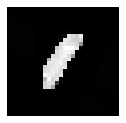

Label: 3


In [37]:
 i = 1


# Plot the image
plt.figure(figsize=(2, 2))
plt.axis('off')
plt.imshow(images_test[i-1], cmap="gray", aspect='auto')
plt.show()

# Print the correct label for the image
print("Label: {}".format(labels_test[i-1]))

<BarContainer object of 10 artists>

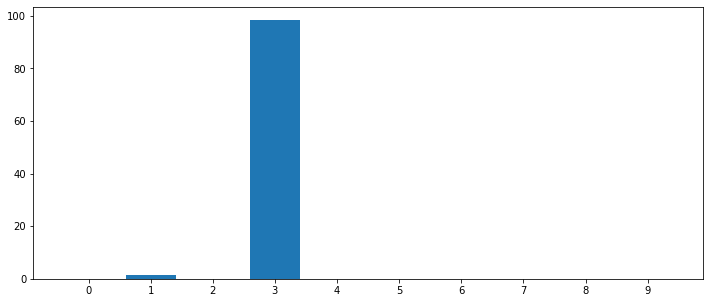

In [38]:
# Obtain the model's predictions (logits)
predictions = model.predict(images_test[i-1:i])

# Convert those predictions into probabilities (recall that we incorporated the softmaxt activation into the loss function)
probabilities = tf.nn.softmax(predictions).numpy()
# Convert the probabilities into percentages
probabilities = probabilities*100


# Create a bar chart to plot the probabilities for each class
plt.figure(figsize=(12,5))
plt.bar(x=[1,2,3,4,5,6,7,8,9,10], height=probabilities[0], tick_label=["0","1","2","3","4","5","6","7","8","9"])